<a href="https://colab.research.google.com/github/Cloud-Dark/tugas-1_komputasi_berbasis_jaringan/blob/main/Absenteeism_at_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
from cycler import cycler
import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn-white')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, RandomTreesEmbedding, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Cloud-Dark/tugas-1_komputasi_berbasis_jaringan/main/Absenteeism_at_work.csv', delimiter=';')

###### Selected dataset contains 740 instances, each instance being an employed person. Features provided in the dataset are those considered to be related to the number of hours an employee was absent from work (target). The goal of this excercise is to group all instances into 3 categories: 1) Low rate of absence (Low); 2) Medium rate of absence (Medium); 3) High rate of absence (High). Upon grouping, We will be further exploring and selecting relevant features from the dataset in order to predict an absentee category for the instances in test portion of the data.

In [6]:
dataset.ID.count()

740

In [7]:
dataset.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [8]:
dataset = dataset.drop(['ID'], axis=1)

In [9]:
dataset.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [10]:
features = ['Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
target = ['Absenteeism time in hours']

In [11]:
# Getting basic statistical information for the target
print(dataset.loc[:, 'Absenteeism time in hours'].mean())
print(dataset.loc[:, 'Absenteeism time in hours'].min())
print(dataset.loc[:, 'Absenteeism time in hours'].max())

6.924324324324324
0
120


In [12]:
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'] < 6, 1, dataset['Absenteeism time in hours'])
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'].between(6, 30), 2, dataset['Absenteeism time in hours'])
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'] > 30, 3, dataset['Absenteeism time in hours'])

In [13]:
# 'Reason for absence' feature in my mind needs to be dropped because it is highly correlated with the target. 
# The more serious the reason is, the longer an employee will be absent from work. If we keep this feature it will leek excessive information to the model.
X = dataset.drop(['Reason for absence', 'Absenteeism time in hours'], axis=1)
y = dataset.loc[:, 'Absenteeism time in hours']

In [14]:
# Updating features to remove 'Reason for absence'
features = ['Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']

In [15]:
# Setting up some visual preferences
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

 Low:  468
 Medium:  244
 High:  28


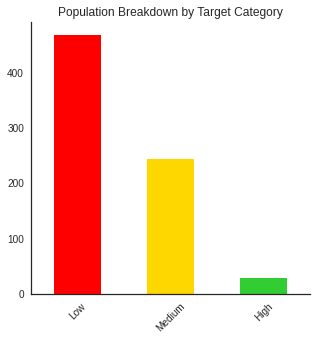

In [16]:
# Calculating population breakdown by target category
Target = y.value_counts()
print(color.BOLD, 'Low:', color.END, Target[1])
print(color.BOLD, 'Medium:', color.END, Target[2])
print(color.BOLD, 'High:', color.END, Target[3])
my_colors = ["red", "gold", "limegreen"]
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)
Target.plot(kind='bar', title='Population Breakdown by Target Category', color=my_colors, ax=ax)
ax.set_xticklabels(['Low', 'Medium', 'High'], rotation = 45)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# There is an obvious class imbalance here, therefore, we can expect the model to have difficulties learning the pattern for Medium and High categories.

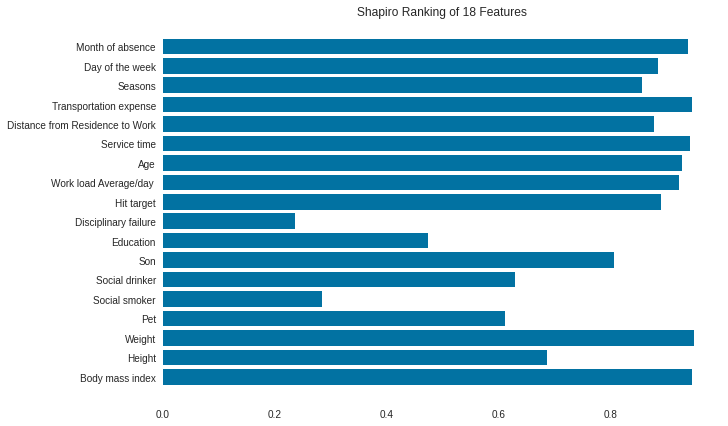

In [17]:
# Creating 1D visualizer with the Sharpiro feature ranking algorithm
fig, ax = plt.subplots(figsize=(10, 7))
visualizer = Rank1D(features=features, ax=ax, algorithm='shapiro')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

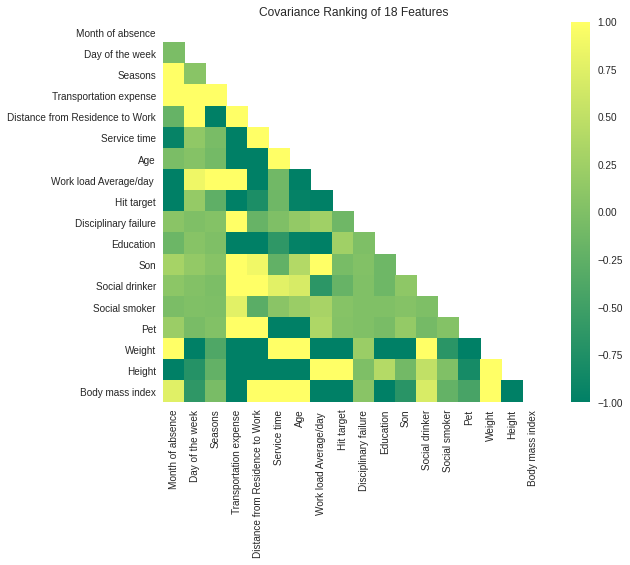

In [18]:
figsize=(10, 7)
fig, ax = plt.subplots(figsize=figsize)
visualizer = Rank2D(features=features, ax=ax, algorithm='covariance', colormap='summer')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

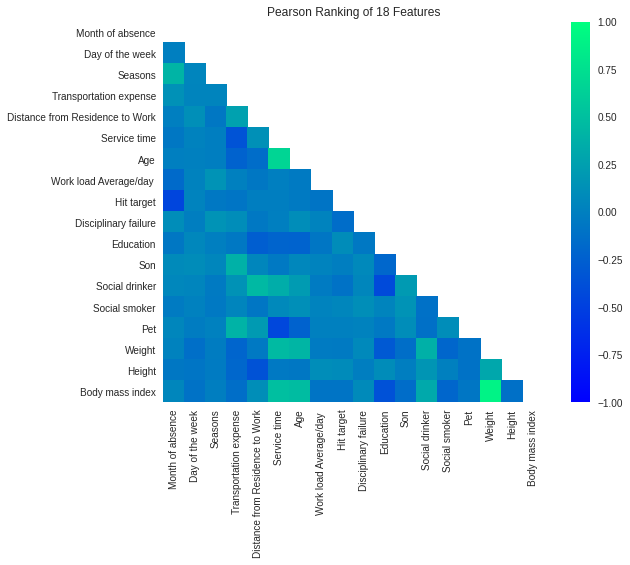

In [19]:
# Instantiate the visualizer with the Pearson ranking algorithm
figsize=(10, 7)
fig, ax = plt.subplots(figsize=figsize)
visualizer = Rank2D(features=features, algorithm='pearson', colormap='winter')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

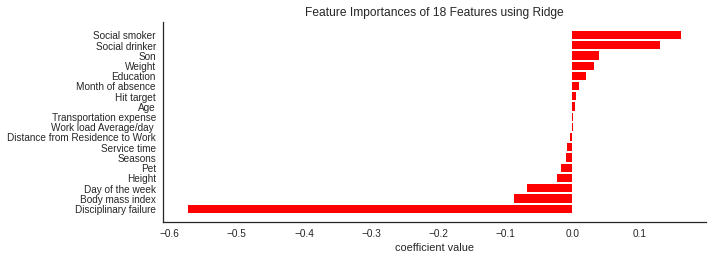

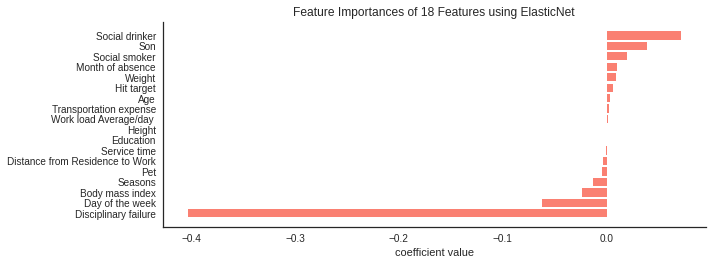

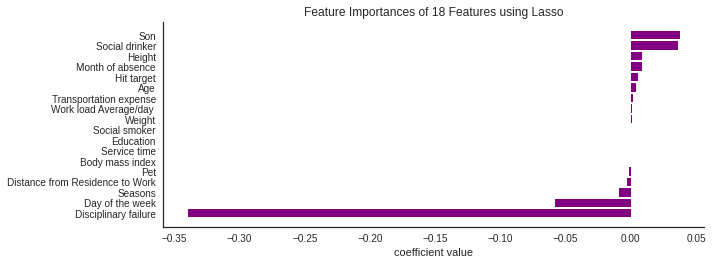

In [20]:
# Visualizing Ridge, Lasso and ElasticNet feature selection models side by side for comparison

# Ridge
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['red'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(311)
labels = features
viz = FeatureImportances(Ridge(alpha=0.1), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Fit and display
viz.fit(X, y)
viz.poof()

# ElasticNet
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['salmon'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
labels = features
viz = FeatureImportances(ElasticNet(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Fit and display
viz.fit(X, y)
viz.poof()

# Lasso
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
labels = features
viz = FeatureImportances(Lasso(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Fit and display
viz.fit(X, y)
viz.poof()

Having analyzed the output of all utilized visualizations (Shapiro algorithm, Pearson Correlation Ranking, Covariance Ranking, Lasso, Ridge and ElasticNet, we can select a number of features which have meaningful coefficient value (positive or negative). These are the features to be kept in the model:
- Disciplinary failure
- Day of the week
- Seasons
- Distance from Residence to Work
- Number of children (Son)
- Social drinker
- Social smoker
- Height
- Weight
- BMI
- Pet
- Month of absence
Graphic visualization of the feature coefficients calculated in a number of different ways simplifies feature selection process, making it more obvious, as it provides an easy way to visualy compare multiple values and consider only those which are statistically significant to the model.

In [21]:
# Dropping features from X based on visual feature importance visualization
X = X.drop(['Transportation expense', 'Age', 'Transportation expense', 'Service time', 'Hit target', 'Education','Work load Average/day '], axis=1)

In [22]:
X.head()

,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,7,3,1,36,0,2,1,0,1,90,172,30
1,7,3,1,13,1,1,1,0,0,98,178,31
2,7,4,1,51,0,0,1,0,0,89,170,31
3,7,5,1,5,0,2,1,1,0,68,168,24
4,7,5,1,36,0,2,1,0,1,90,172,30


In [23]:
# Encoding some categorical features
X = pd.get_dummies(data=X, columns=['Month of absence', 'Day of the week', 'Seasons'])

In [24]:
X.head()

,Distance from Residence to Work,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Month of absence_0,...,Month of absence_12,Day of the week_2,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_1,Seasons_2,Seasons_3,Seasons_4
0,36,0,2,1,0,1,90,172,30,0,...,0,0,1,0,0,0,1,0,0,0
1,13,1,1,1,0,0,98,178,31,0,...,0,0,1,0,0,0,1,0,0,0
2,51,0,0,1,0,0,89,170,31,0,...,0,0,0,1,0,0,1,0,0,0
3,5,0,2,1,1,0,68,168,24,0,...,0,0,0,0,1,0,1,0,0,0
4,36,0,2,1,0,1,90,172,30,0,...,0,0,0,0,1,0,1,0,0,0


In [25]:
print(X.columns)

Index(['Distance from Residence to Work', 'Disciplinary failure', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index', 'Month of absence_0', 'Month of absence_1',
       'Month of absence_2', 'Month of absence_3', 'Month of absence_4',
       'Month of absence_5', 'Month of absence_6', 'Month of absence_7',
       'Month of absence_8', 'Month of absence_9', 'Month of absence_10',
       'Month of absence_11', 'Month of absence_12', 'Day of the week_2',
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Seasons_1', 'Seasons_2', 'Seasons_3',
       'Seasons_4'],
      dtype='object')


In [26]:
# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)

In [57]:
# Creating a function to visualize estimators
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y)



def visual_model_selection(X, y, estimator):
    visualizer = ClassificationReport(estimator, classes=['Low', 'Medium', 'High'], cmap='PRGn')
    visualizer.fit(X, encoded_y_train)  
    visualizer.score(X, encoded_y_train)
    visualizer.poof()



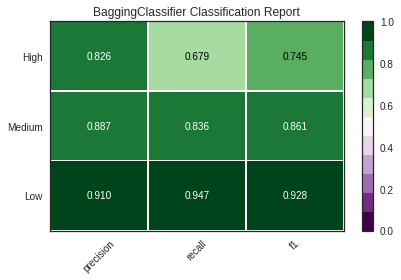

In [58]:
visual_model_selection(X, encoded_y_train, BaggingClassifier())

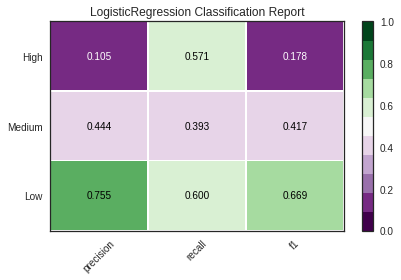

In [59]:
visual_model_selection(X, y, LogisticRegression(class_weight='balanced'))

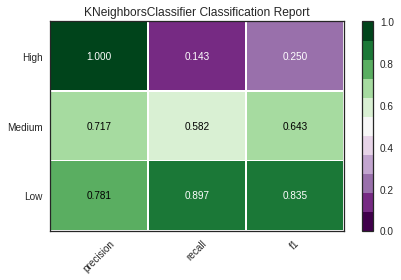

In [60]:
visual_model_selection(X, y, KNeighborsClassifier())

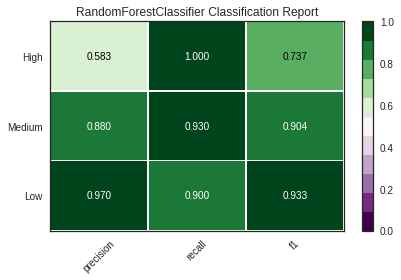

In [61]:
visual_model_selection(X, y, RandomForestClassifier(class_weight='balanced'))

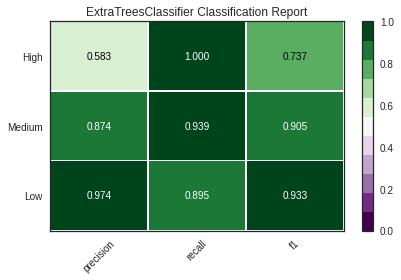

In [62]:
visual_model_selection(X, y, ExtraTreesClassifier(class_weight='balanced'))

For the purposes of this exercise we will consider f1 score when estimating models' performance and making a selection. All of the above models visualized through yellowbrick's Classification Report Visualizer makes clear that classifier algorithms performed the best. We need to pay special attention to the f1 score for the underrepresented classes, such as "High" and "Medium", as they contained significantly less instances than "Low" class. Therefore, high f1 score for all three classes indicate a very strong performance of the follwing models: Bagging Classifier, Random Forest Classifier, Extra Trees Classifier.
We will also use Class Prediction Error visualizer for these models to confirm their strong performance.

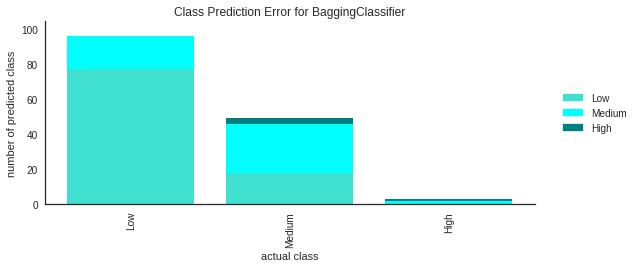

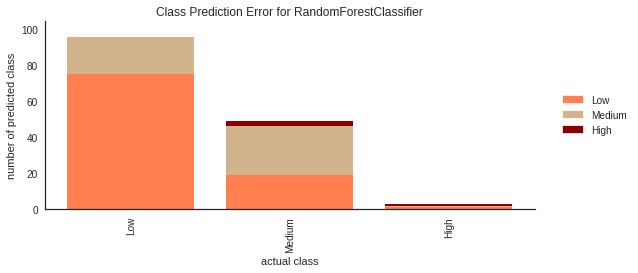

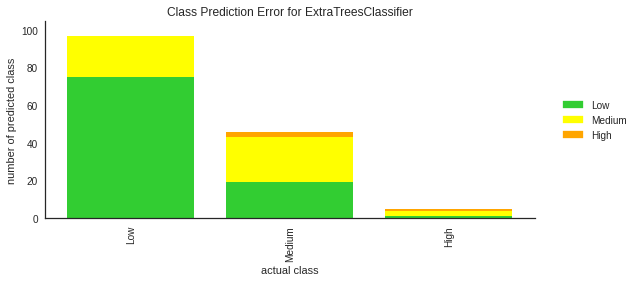

In [81]:
# Visualizaing class prediction error for Bagging Classifier model


encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['turquoise', 'cyan', 'teal', 'coral', 'blue', 'lime', 'lavender', 'lightblue', 'darkgreen', 'tan', 'salmon', 'gold', 'darkred', 'darkblue'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(311)
visualizer = ClassPredictionError(BaggingClassifier(), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

visualizer.fit(X_train, encoded_y_train)
visualizer.score(X_test, encoded_y_test)
g = visualizer.poof()

# Visualizaing class prediction error for Random Forest Classifier model
classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['coral', 'tan', 'darkred'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
visualizer = ClassPredictionError(RandomForestClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

visualizer.fit(X_train, encoded_y_train)
visualizer.score(X_test, encoded_y_test)
g = visualizer.poof()

# Visualizaing class prediction error for Extra Trees Classifier model
classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['limegreen', 'yellow', 'orange'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
visualizer = ClassPredictionError(ExtraTreesClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

visualizer.fit(X_train, encoded_y_train)
visualizer.score(X_test, encoded_y_test)
g = visualizer.poof()

Now we can conclude that ExtraTreesClassifier seems to perform better as it had no instances from "High" class reported under the "Low" class. Let's proceed with hyperparameter tuning for that model!

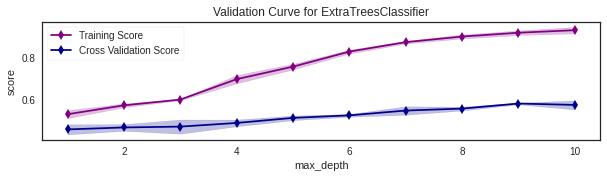

In [85]:
# Performing Hyperparameter tuning 
# Validation Curve
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple', 'darkblue'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(411)
viz = ValidationCurve(ExtraTreesClassifier(class_weight='balanced'), ax=ax, param_name="max_depth", param_range=np.arange(1, 11), cv=3, scoring="accuracy")

# Fit and poof the visualizer
viz.fit(X, y)
viz.poof()

We can aobserve on the above chart that even though training score keeps rising continuosly, cross validation score drops down at max_depth=8. Therefore, we will chose that parameter for our selected model.

In [122]:
visual_model_selection(X.shape, y.shape, ExtraTreesClassifier(class_weight='balanced', max_depth=8))

ValueError: ignored

Visualization techniques prove to be a useful tool in the machine learning toolkit, and yellowbrick provides a wide selection of visualizers to meet the needs at every step and stage of the data science project pipeline. Ranging from feature analysis and selection, to model selection and optimization, yellowbrick visualizers make it easy to make a decision as to which features to keep in the model, which model performs best, and how to tune model's hyperparameters for future use. Moreover, visualizing algorithmic output also makes it easy to present insights to the audience and stakeholders, and contribute to the simplified interpretability of the machine learning results.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0523f494-d44e-4866-bb13-e6a8bca7eb82' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>